* Problem Statement:  AVOCADO PROJECT
    

The table below represents weekly 2018 retail scan data for National
retail volume (units) and price. Retail scan data comes directly from retailers’
cash registers based on actual retail sales of Hass avocados.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados.
Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
    * Date - The date of the observation
    * AveragePrice - the average price of a single avocado
    * type - conventional or organic
    * year - the year
    * Region - the city or region of the observation
    * Total Volume - Total number of avocados sold
    * 4046 - Total number of avocados with PLU 4046 sold
    * 4225 - Total number of avocados with PLU 4225 sold
    * 4770 - Total number of avocados with PLU 4770 sold



* Inspiration Process

The dataset can be seen in two angles to find the region and find the
average price .

Task: One of Classification and other of Regression

@ Here in the problem, we will try to see if we can predict the Avocado’s      Average Price based on different features. The features are different 
(Total Bags,Date,Type,Year,Region…).

The variables of the dataset are as follows--

*  Categorical: ‘region’,’type’
*  Date: ‘Date’
*  Numerical:’Total Volume’, ‘4046’, ‘4225’, ‘4770’, ‘Total Bags’, ‘Small   *      Bags’,’Large Bags’,’XLarge Bags’,’Year’
*  Target:‘AveragePrice’

In [ ]:
# Packages to be imported are as follows-

import pandas as pd
import matplotlib
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline



import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore")

In [7]:
# Reading the data
avocado_data = pd.read_csv("D:\\Data Trained\\avocado.csv")

# Getting the shape
avocado_data.shape

(18249, 14)

In [8]:
# This will print the names of all columns.

avocado_data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
# looking at the head of the data

avocado_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
# It will print the last n rows of the Data Frame
avocado_data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [20]:
avocado_data.info() 
# It will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


* Here,we dont have any missing values with 18249 complete data and 13 columns.
Now we do Feature Engineering on the Date Feature in pre-processing
later so we can do to use the day and the month columns in building the
machine learning model further.

In [11]:
# Getting missing values using this
avocado_data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


* So, here all values 18249 are perfect and dont have any mising values

In [12]:
# Let see the null count for each column, but will not count
avocado_data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

* Its good , there are no null values adn all are zero's

In [52]:
# making Profiling
import pandas_profiling
profile = pandas_profiling.ProfileReport(avocado_data)
profile.to_file(outputfile="avocado_before_preprocessing.html")

ModuleNotFoundError: No module named 'pandas_profiling'

In [14]:
avocado_data.shape


(18249, 14)

In [15]:
avocado_data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [17]:
  # Using first 5 records
avocado_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avocado_data['Date']=pd.to_datetime(avocado_data['Date'])
avocado_data['Month']=avocado_data['Date'].apply(lambda x:x.month)
avocado_data['Day']=avocado_data['Date'].apply(lambda x:x.day)

In [ ]:
# Which type of Avocados are more in demand
Type=avocado_data.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace]

In [ ]:
# In which range Average price lies on, how the distribution look like?

<AxesSubplot:xlabel='AveragePrice'>

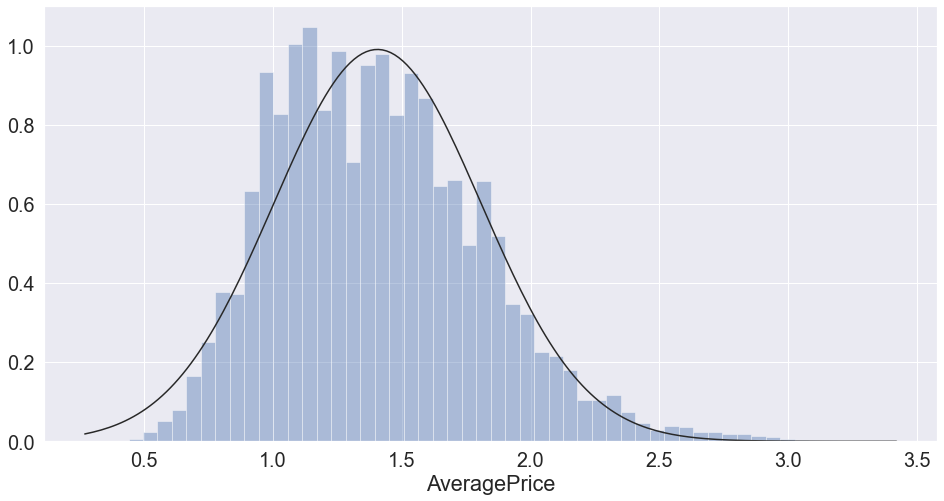

In [19]:
sns.set(font_scale=1.8) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(16, 8))
sns.distplot(a=avocado_data.AveragePrice, kde=False, fit=norm)

* The graph distribution shows that the price of avocado is between 1.1 - 1.5

In [ ]:
# lets compare Oraganic Vs Coventional
plt.figure(figsize=(18,10))
sns.lineplot(x = "Month", y = "AveragePrice", hue ='type', data=avocado_data)
plt.show()

In [29]:
# Lets plot Average price distribution based on region
region_list=list(avocado_data.region.unique())
average_price=[]

for i in region:
    x=avocado_data[avocado_data.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

avocado_data1=pd.DataFrame({'region':region,'average_price':average_price})
new_index=avocado_data1.average_price.sort_values(ascending=False).index.values
sorted_data=avocado_data.reindex(new_index)

plt.figure(figsize=(22,12))
ax=sns.barplot(x=sorted_data.region,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

NameError: name 'region' is not defined

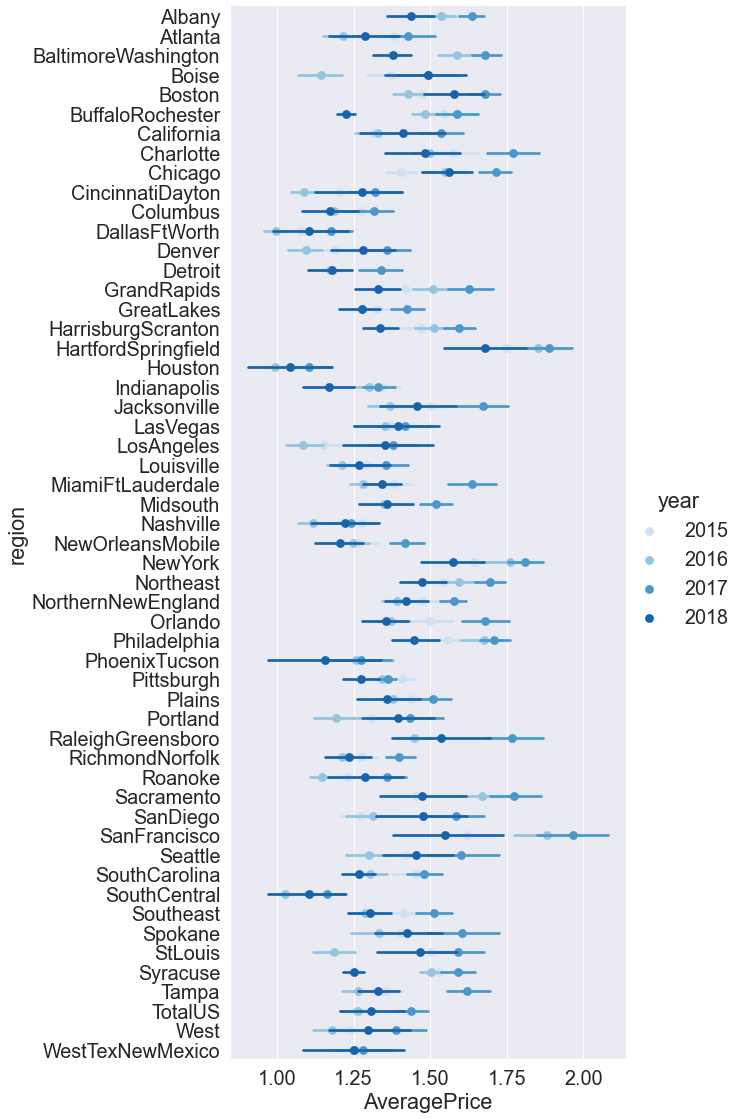

In [30]:
# Finding the year and region of the Average price the highest
g = sns.factorplot('AveragePrice','region',data=avocado_data,
                   hue='year',
                   size=16,
                   aspect=0.6,
                   palette='Blues',
                   join=False,
              )

* Looks there was a high increase in Avocado prices

Text(0.5, 1.0, 'Average Price')

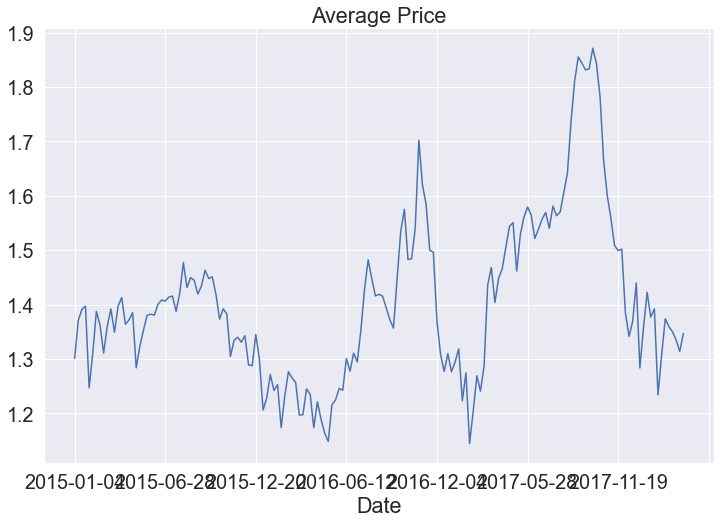

In [31]:
# Checking price distribution over the date column?
byDate=avocado_data.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

In [ ]:
* This graph shows there was a huge hike in prices in July 2017 and bfore Jan 2018

<AxesSubplot:>

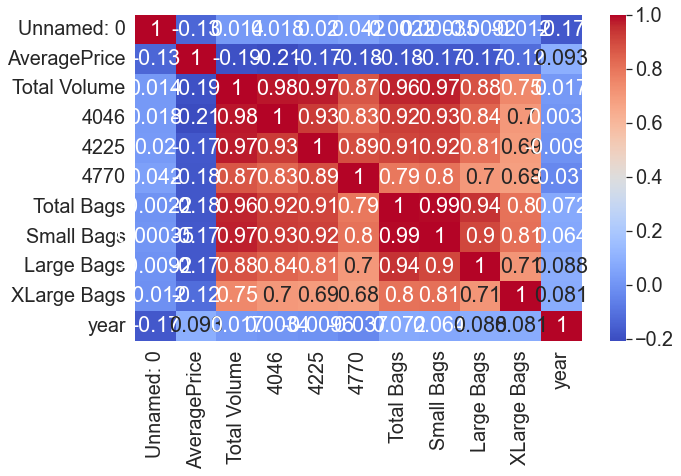

In [32]:
# preparing a Heat map
plt.figure(figsize=(10,6))
sns.heatmap(avocado_data.corr(),cmap='coolwarm',annot=True)

In [ ]:
* From the above heatmap, all Features are not correleted with the Average Price,
  but most of them are correlated with each other.

In [34]:
# Building a Feature Engineering of a model

avocado_data['type'].nunique()

2

In [35]:
avocado_data['region'].nunique()

54

In [36]:
avocado_data_final=pd.get_dummies(avocado_data.drop(['region','Date'],axis=1),drop_first=True)

In [37]:
avocado_data_final.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0


In [38]:
avocado_data_final.tail()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,1
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1
18248,11,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1


# Doing model selection/predictions
As our dat is Continiuos( Average price)

In [ ]:
# Checking with Linear Regression

In [39]:
X=avocado_data_final.iloc[:,1:14]
y=avocado_data_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [41]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.1181754286691315e-15
MSE: 8.820015366978579e-29
RMSE: 9.39149368683096e-15


@ the RMSC value is low , lets check further

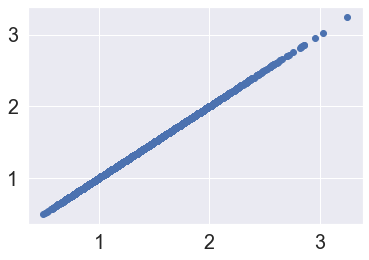

In [42]:
plt.scatter(x=y_test,y=pred)

* Yes we have got a straight line- its good

In [ ]:
* Lets check  with the Decision Tree Regression model

In [43]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

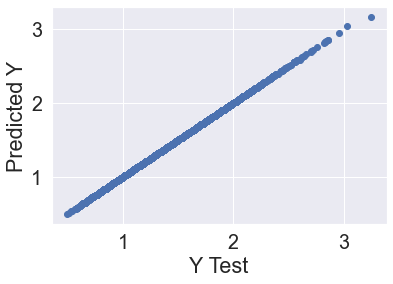

In [44]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

* Here also we have got Good straight line as in Linear Regression

In [46]:
# Lets check with RMSC
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.287671232999637e-05
MSE: 1.8630136986301429e-06
RMSE: 0.0013649225980362925


In [ ]:
* Excellent , we have got RMSC value still lower than above one

* Now am going to try one last model to see if I can improve the
predictions for this data which is the RandomForestRegressor model

In [47]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 6.630136986479455e-05
MSE: 5.219282191780772e-06
RMSE: 0.0022845748382972204


* Here RMSC value is still more lower than previous one- and its best model
here to solve

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

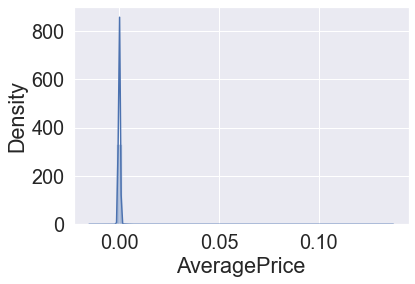

In [49]:
sns.distplot((y_test-pred),bins=50)

,Y Test,Pred
8604,0.82,0.82
2608,0.97,0.97
14581,1.44,1.44
4254,0.97,0.97
16588,1.45,1.45


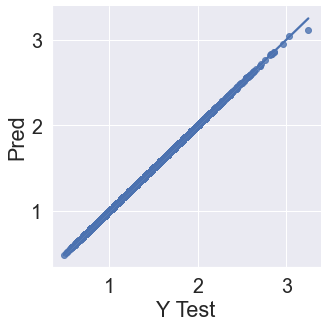

In [50]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [ ]:
# CONCLUSIONS
    1.  Seen the impact of columns like type, year/date on the
        Average price increase/decrease rate.
    2.  The important inference drawn from all this analysis are, 
        the features on which price is highly positively and negatively
        coorelated with.
    3.  Experimented with various ML models like Linear Regreesion, 
        RandaomForest Regreesor and DecisionTreeRegressor.
    3.  Also , Came to know through analysis which model will be work with
        better accuracy with the help of Low residual and RMSE scores.
    5.  Finally this project helped me to gain insights with the work
        flow, which model to choose first and go step by step to fine
        tune the predictions to attain results with good accuracy.